<a href="https://colab.research.google.com/github/NicKostii/UniProjects/blob/main/Car_prediction_Dataset_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Add, BatchNormalization, Dropout, ReLU, LeakyReLU
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.losses import Huber

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/car_price_prediction_EDA_1 (2).csv")

In [ ]:
df

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Color,Airbags,Turbo,Drive wheels_Front,Drive wheels_Rear,Doors_4-5,Doors_>5,Wheel_Right-hand drive
0,13328,1399,5,20,2010,1,1,5,3.5,186005.0,6.0,1,5,12,0,0,0,1,0,0
1,16621,1018,8,27,2011,1,0,3,3.0,192000.0,6.0,0,3,8,0,0,0,1,0,0
2,8467,0,8,21,2006,9,0,3,1.3,200000.0,4.0,2,3,2,0,1,0,1,0,1
3,3607,862,8,23,2011,1,1,5,2.5,168966.0,4.0,1,4,0,0,0,0,1,0,0
4,11726,446,8,21,2014,9,1,3,1.3,91901.0,4.0,1,5,4,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16893,5802,1055,7,22,2013,8,1,0,3.5,107800.0,6.0,1,1,12,0,0,1,1,0,0
16894,8467,0,7,19,1999,6,1,6,2.0,300000.0,4.0,3,5,5,1,0,1,0,0,0
16895,15681,831,5,21,2011,8,1,3,2.4,161600.0,4.0,0,11,8,0,1,0,1,0,0
16896,26108,836,5,7,2010,1,1,0,2.0,116365.0,4.0,1,1,4,0,1,0,1,0,0


In [ ]:
X = df.drop(columns=['Category'])
y = df['Category']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
num_classes = len(set(y_train))
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

In [ ]:
x = Dense(512, kernel_regularizer=l2(0.001))(inputs)
x = LeakyReLU(alpha=0.1)(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)
x = Dense(256, kernel_regularizer=l2(0.001))(inputs)
x = LeakyReLU(alpha=0.1)(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(128, kernel_regularizer=l2(0.001))(inputs)
x = LeakyReLU(alpha=0.1)(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 19)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 32)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_11 (LeakyReLU)           │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 11)                  │             363 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,003 (3.92 KB)

 Trainable params: 1,003 (3.92 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
169/169 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3145 - loss: 2.1311 - val_accuracy: 0.6176 - val_loss: 1.2124
Epoch 2/300
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6341 - loss: 1.1274 - val_accuracy: 0.6797 - val_loss: 0.9900
Epoch 3/300
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6746 - loss: 0.9575 - val_accuracy: 0.6964 - val_loss: 0.9192
Epoch 4/300
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6881 - loss: 0.8979 - val_accuracy: 0.7093 - val_loss: 0.8808
Epoch 5/300
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7152 - loss: 0.8353 - val_accuracy: 0.7175 - val_loss: 0.8577
Epoch 6/300
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7208 - loss: 0.8055 - val_accuracy: 0.7223 - val_loss: 0.8403
Epoch 7/300
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7086 - loss: 0.8221 - val_accuracy: 0.7249 - val_loss: 0.8262
Epoch 8/300
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7206 - loss: 0.8113 - val_accu

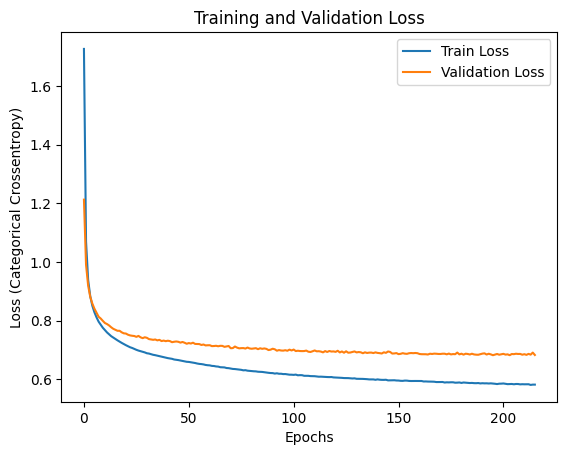

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Overall Accuracy: 78.43%

Confusion Matrix:
[[   1    3    0    0    0    0    0    1    0    0    0]
 [   0  747    0    0    0    6    1    1  122   16    0]
 [   0    0    0    0    0    0    2    0    2    1    0]
 [   0    7    0   22    0   13    0    1   18   13    4]
 [   0    0    0    0    1    0    0    0    0    0    0]
 [   0    8    0    6    0   75    0    6   16    6    2]
 [   0    0    0    1    0    0   69    0   22    8    1]
 [   0    1    1    0    0    2    0   51    5    0    1]
 [   0   90    0    5    0   11    6    3 1363  107    8]
 [   0    5    0    4    0    4    4    1  157  307    5]
 [   0    1    0    1    0    1    0   12    5    2   15]]

Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      0.20      0.33         5
     Class 1       0.87      0.84      0.85       893
     Class 2       0.00      0.00      0.00         5
     Class 3       0.56      0.28  

In [ ]:
inputs = Input(shape=(X_train.shape[1],))

x = Dense(32, kernel_regularizer=l2(0.001))(inputs)
x = LeakyReLU(alpha=0.1)(x)

outputs = Dense(num_classes, activation='softmax')(x)

model = Model(inputs, outputs)

optimizer = Adam(learning_rate=0.001)

model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=300,
    batch_size=64,
    verbose=1,
    callbacks=[early_stopping]
)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (Categorical Crossentropy)')
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

y_pred = model.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f"Overall Accuracy: {accuracy * 100:.2f}%")

conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
print("\nConfusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test_classes, y_pred_classes, target_names=[f"Class {i}" for i in range(num_classes)])
print("\nClassification Report:")
print(class_report)

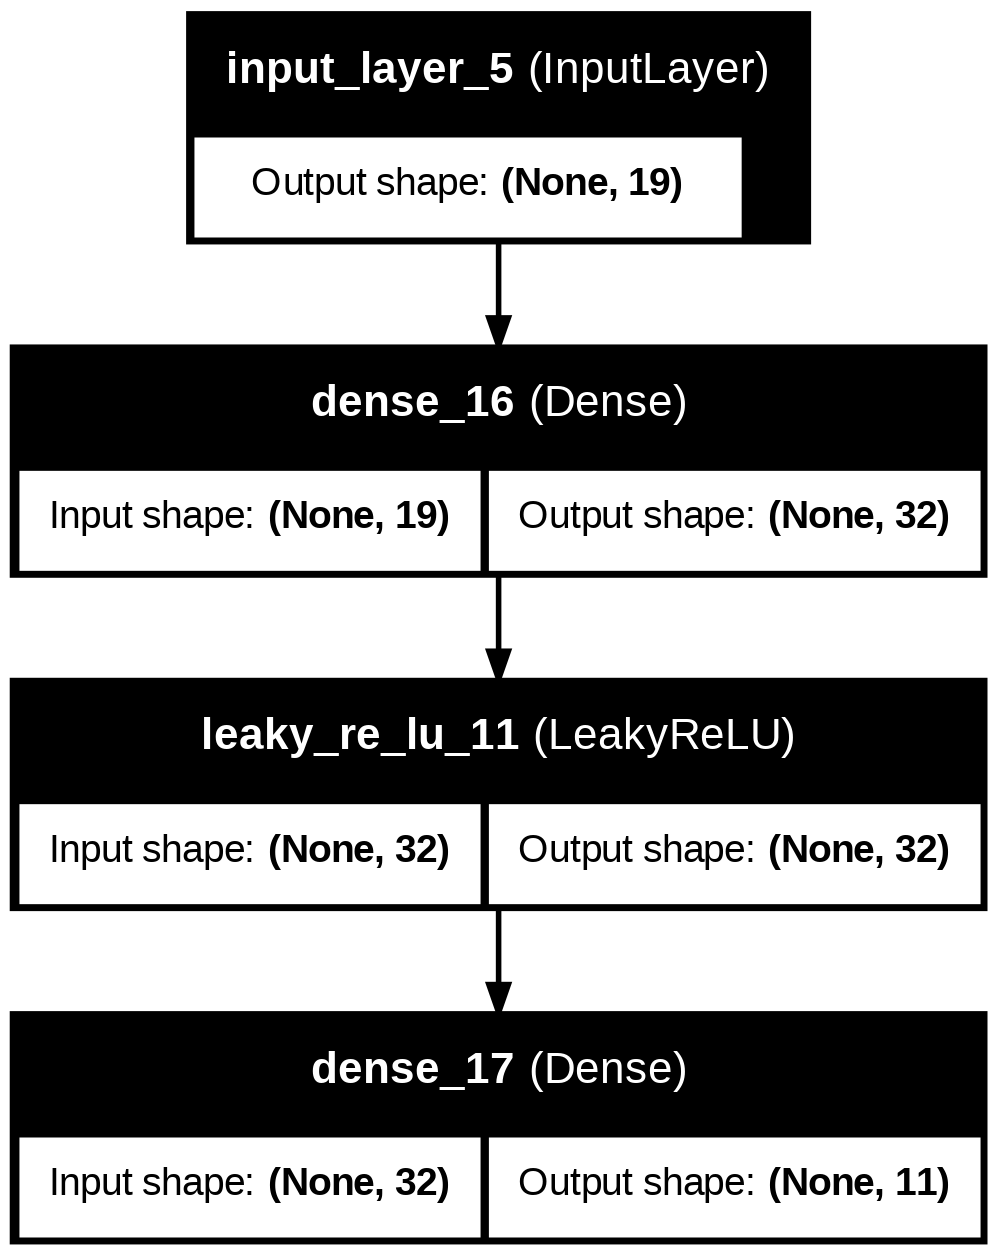

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)